<a href="https://colab.research.google.com/github/lgeralas/Examen1/blob/main/microretailer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#importar librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
 #cargar archivo csv desde equipo 
from google.colab import files 
files.upload()

In [45]:
#Carga desde un archivo .csv sin indice
microretailer = pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [46]:
#Verificamos info del Data Frame
microretailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [47]:
#Filtramos todos los datos númericos para así poder saber que tipo de método de eliminación de datos nulos utilizar
filtros=microretailer.iloc[:,[13,14,16,21,22,29,31,33,41,42,43,44,45,49,51,56,57,58,59,60,78,90]] 
filtros

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,2,0.0,4,2.0,2.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0,4.0,8,1.0,1.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
2,0,0.0,24,2.0,2.0,NaN,0.0,NaN,NaN,0.0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
3,0,0.0,2,1.0,1.0,NaN,4.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0,0.0,16,0.0,0.0,NaN,0.0,NaN,NaN,1.0,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,1,5.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,3,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Identificar valores nulos por columna de todos los valores númericos que se encuentran en esta matriz de datos
valores_nulos=filtros.isnull().sum()
valores_nulos

97_number_of_customers_in_store                        0
268_number_fridges                                     3
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                         60
4_number_permanent_employees_last_year                76
103_number_own_fridges                               144
145_number_direct_competitors                         68
24_burnout                                           133
271_card_fee                                         171
272_card_days_receive_money                          127
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                    147
36_credit_default_rate                               157
315_frequency_topups                                 161
316_frequency_utility_bills                          169
317_home_deliveries            

In [49]:
#Una vez que determinamos cuales son nuestras variables númericas, es necesario el revisarlas e identificar que tipo de dato se nos presenta
#Analizando los datos númericos vemos que los datos nulos pueden ser rellenados con cero, ya que si no presenta información necesaría esta será igual a cero 
#
microretailer=microretailer.fillna(0)

In [50]:
#Filtramos todos los datos númericos, los cuales ya estan limpios, para así analizar sus valores atípicos
filtros=microretailer.iloc[:,[13,14,16,21,22,29,31,33,41,42,43,44,45,49,51,56,57,58,59,60,78,90]] 


<Figure size 3600x3600 with 0 Axes>

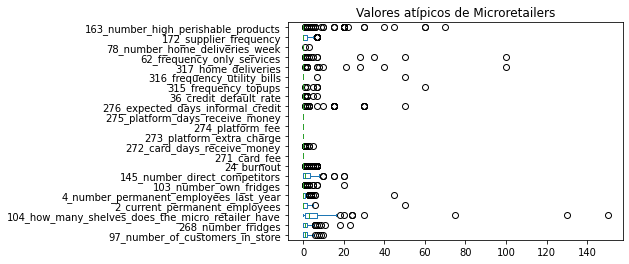

In [51]:
#Realizamos diagrama de caja o bigote de cada columna del data frame para así saber que tan alejados estan los datos de nuestra data
fig=plt.figure(figsize=(50,50))
filtros.plot(kind='box',vert=False)
plt.title('Valores atípicos de Microretailers')
plt.show () #dibujamos el diagrama

In [52]:
#Método aplicando desviación estandar. Encuentra los valores extremos 
y=filtros
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print('Limite superior permitido', Limite_Superior)
print('Limite inferior permitido', Limite_Inferior)

Limite superior permitido 97_number_of_customers_in_store                       6.591777
268_number_fridges                                   10.151756
104_how_many_shelves_does_the_micro_retailer_have    55.812917
2_current_permanent_employees                        13.295707
4_number_permanent_employees_last_year               11.922542
103_number_own_fridges                                5.885954
145_number_direct_competitors                        12.488968
24_burnout                                            6.996329
271_card_fee                                          0.000000
272_card_days_receive_money                           2.123366
273_platform_extra_charge                             0.000000
274_platform_fee                                      0.000000
275_platform_days_receive_money                       0.000000
276_expected_days_informal_credit                    22.690692
36_credit_default_rate                                2.316189
315_frequency_topups         

In [53]:
#Encontramos outliers del Dataframe
outliers= filtros[(y>Limite_Superior)|(y<Limite_Inferior)]
#Obtenemos datos limpiosy los outliers se convertiran en nulos en el Dataframe
data3=filtros[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,2.0,0.0,4.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4.0,8.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,2.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#Reemplazar valores átipicos (nulos) del dataframe con mean()
data_clean=data3.fillna(round(data3.mean(),1))
data_clean

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,2.0,0.0,4.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4.0,8.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4
2,0.0,0.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4
3,0.0,0.0,2.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Unimos las columnas de los strings que forman parte de la información impotante de la micro empresa, para saber la realación de sus datos
strings=microretailer[['_record_id','_title', '_updated_by', '228_store_name','232_type_of_store']]
Datos_limpios=pd.concat([strings, data_clean], axis=1)
Datos_limpios

,_record_id,_title,_updated_by,228_store_name,232_type_of_store,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",Salomon Abdala Perez,Eugene’s Compostura,Tailor,2.0,0.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",Salomon Abdala Perez,Frutas y verduras Angy,Grocery store (aka. nanostore),0.0,4.0,8.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",Salomon Abdala Perez,Libélula,Grocery store (aka. nanostore),0.0,0.0,24.0,2.0,2.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",Salomon Abdala Perez,Quality fix,Grocery store (aka. nanostore),0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",Salomon Abdala Perez,Artesanías Los Pinos,Grocery store (aka. nanostore),0.0,0.0,16.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",Emilio Garza,July Store,Grocery store (aka. nanostore),1.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",Emilio Garza,Miscelánea rubí,Grocery store (aka. nanostore),1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",Emilio Garza,La fonda,Micro-restaurant (aka. fondita),3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",Francisco Adán,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",Micro-restaurant (aka. fondita),0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv('Datos_limpios_microretailer_mit.csv')

#descargar archivo filtrado en csv
from google.colab import files

files.download('Datos_limpios_microretailer_mit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>